In [1]:
import keras  
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from keras.models import load_model
from keras.layers import Lambda
import tensorflow as tf

In [3]:
tf.keras.preprocessing.image_dataset_from_directory(
    directory="C:\\Users\\Akash\\Downloads\\Dataset",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 558 files belonging to 1 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

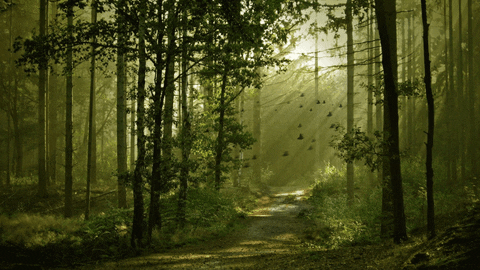

In [4]:
tf.keras.preprocessing.image.load_img(
    path="C:\\Users\\Akash\\Downloads\\Dataset\\Dataset\\train_set\\forest\\with_fire (1).gif", grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest"
)

In [5]:
from numpy import *
image = tf.keras.preprocessing.image.load_img("C:\\Users\\Akash\\Downloads\\Dataset\\Dataset\\train_set\\forest\\with_fire (1).gif")
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = image.predict(input_arr)

NameError: name 'np' is not defined

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
#: Applying ImageDataGenerator functionality to trainset. 
x_train = train_datagen.flow_from_directory(r'C:\Users\Akash\Downloads\Dataset\Dataset\train_set', 
                                                target_size = (128,128), 
                                                batch_size = 32, 
                                                class_mode= 'binary')


Found 436 images belonging to 2 classes.


In [8]:
x_test = test_datagen.flow_from_directory(r'C:\Users\Akash\Downloads\Dataset\Dataset\test_set',
                                           target_size = (128,128), 
                                           batch_size = 32, 
                                           class_mode= 'binary')

Found 121 images belonging to 2 classes.


In [9]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Dense,Flatten
import warnings
warnings.filterwarnings('ignore')

In [10]:
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 256)               32514304  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 32,515,457
Trainable params: 32,515,457
Non-trainable params: 0
____________________________________________

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','mse'])

In [12]:
model.fit_generator (x_train, steps_per_epoch=14, 
                     epochs=10, validation_data=x_test, 
                     validation_steps=4)

Epoch 1/10
14/14 [==============================] - 54s 4s/step - loss: 3.2779 - accuracy: 0.6216 - mse: 0.3347 - val_loss: 0.1932 - val_accuracy: 0.9174 - val_mse: 0.0592
Epoch 2/10
14/14 [==============================] - 36s 3s/step - loss: 0.4675 - accuracy: 0.7523 - mse: 0.1528 - val_loss: 0.1858 - val_accuracy: 0.8926 - val_mse: 0.0605
Epoch 3/10
14/14 [==============================] - 37s 3s/step - loss: 0.2811 - accuracy: 0.8624 - mse: 0.0898 - val_loss: 0.1608 - val_accuracy: 0.9174 - val_mse: 0.0496
Epoch 4/10
14/14 [==============================] - 36s 3s/step - loss: 0.2217 - accuracy: 0.9037 - mse: 0.0677 - val_loss: 0.1101 - val_accuracy: 0.9669 - val_mse: 0.0316
Epoch 5/10
14/14 [==============================] - 36s 3s/step - loss: 0.1919 - accuracy: 0.9174 - mse: 0.0595 - val_loss: 0.0795 - val_accuracy: 0.9669 - val_mse: 0.0231
Epoch 6/10
14/14 [==============================] - 35s 3s/step - loss: 0.1746 - accuracy: 0.9312 - mse: 0.0535 - val_loss: 0.0618 - val_acc

In [13]:
model.save("forest1.h5")

In [14]:
#import load_model from keras.model
import matplotlib.pyplot as plt
from keras.models import load_model
#import image class from keras
from keras.preprocessing import image
#import numpy
import numpy as np
from PIL import Image
#import cv2
import cv2
from PIL import Image
from keras.utils import img_to_array

In [15]:
model = load_model("forest1.h5")

In [16]:
def prediction(img_path):
    i = cv2.imread(img_path)
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    img = Image.open(img_path)
    img = img.resize((128,128))
    x = img_to_array(img)
    x = np.expand_dims(x,axis=0)
    pred = model.predict(x)
    plt.imshow(i)
    print("%s"%("FOREST FIRE DETECTED! SMS SENT!" if pred==[[1.]] else "NO FOREST FIRE DETECTED"))

1/1 [==============================] - 1s 682ms/step
NO FOREST FIRE DETECTED


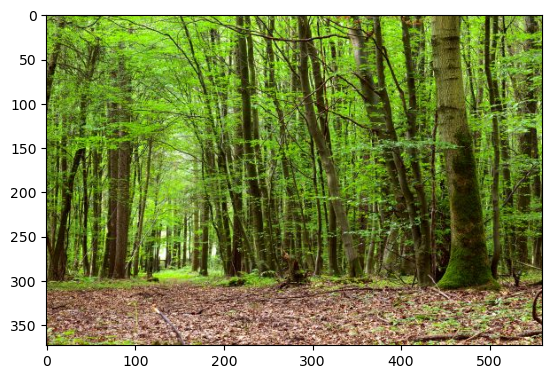

In [17]:
prediction(r'C:\Users\Akash\Downloads\Dataset\Dataset\test_set\forest\beech_oak_forest_560.jpg')

In [ ]:
prediction(r'C:\Users\Akash\Downloads\Dataset\Dataset\test_set\forest\europeslostf.jpg')

In [ ]:
prediction(r'C:\Users\Akash\Downloads\Dataset\Dataset\test_set\forest\559672101517195076987621071193712n.jpg')

1/1 [==============================] - 0s 112ms/step
FOREST FIRE DETECTED! SMS SENT!


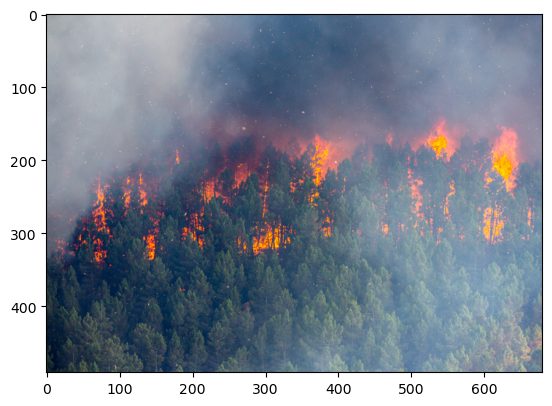

In [87]:
prediction(r'C:\Users\Akash\Downloads\Dataset\Dataset\test_set\with fire\in_forestfires_shutter.jpg')

1/1 [==============================] - 0s 115ms/step
FOREST FIRE DETECTED! SMS SENT!


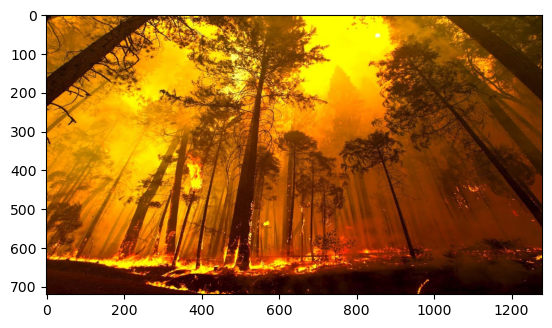

In [88]:
prediction(r'C:\Users\Akash\Downloads\Dataset\Dataset\test_set\with fire\maxresdefault.jpg')

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.models import load_model
from twilio.rest import Client
import getpass
from playsound import playsound
msg_sent = False
model = load_model(r'forest1.h5')
video = cv2.VideoCapture("C:\\Users\\Akash\\Downloads\\forest fire vedio.mp4")
def send_message():
    global phno
    account_sid = 'AC17385ec6719b077cd7b11729f97ffae0'
    auth_token = '4ef4b6bc05abacd88b778518cd1aaba8'
    client = Client(account_sid,auth_token)
    msg = client.messages.create(
        body="Fire Detected! Get to safety immediately!!!!",
        from_=' +16802196438',
        to=phno
    )
    print(msg.sid)
    print("Fire Detected")
    print("SMS Sent")
phno = getpass.getpass(prompt="Enter your phone number with the country code:")

In [ ]:
v = 0
while True:
    success,frame = video.read()
    cv2.imwrite('output.jpg',frame)
    img = load_img("C:\\Users\\Akash\\Downloads\\Dataset\\Dataset\\test_set\\with fire\\GettyImages_482867948.0.jpg",target_size=(128,128))
    x = img_to_array(img)
    x = np.expand_dims(x,axis=0)
    predict = model.predict(x)
    y = int(predict[0][0])
    if y==1:
        if not msg_sent:
            send_message()
            msg_sent = True
            playsound("C:\\Users\\Akash\\Downloads\\alarm.mp3")
    else:
        print("No Forest Fire Detected")
    cv2.imshow("Image",img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()